### Importing Libraries

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


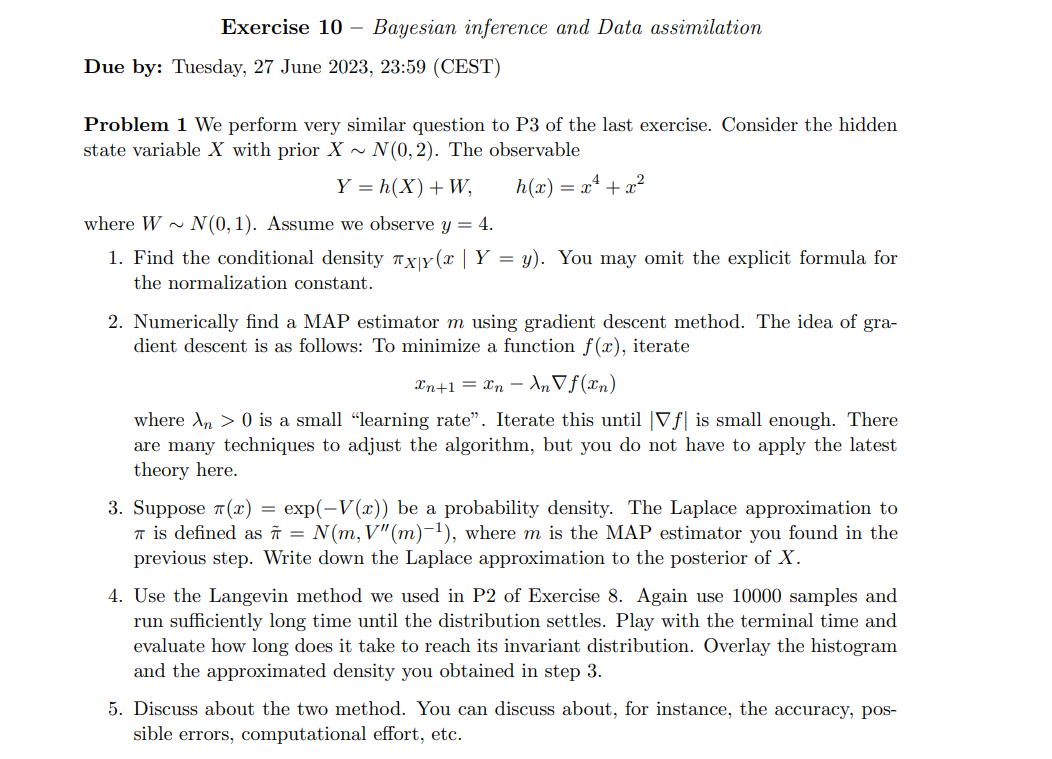

### Problem 1.1

- Given $X\sim N(0,2), W \sim (0,1)$
- $Y = h(X) + W$ ; $h(x) = x^4 + x^2$
- Conditional Mean: $E[Y|X=x] = E[h(X) + W | X = x] = E[h(x)+W] = h(x) + E[W] = h(x) = x^4+x^2$
- Conditional Var : $Var[Y|X = x] = Var[h(X) + W | X = x] = Var[W] = 1$
#### Thus $\pi_{Y|X} = \frac{e^\frac{-(y-x^4-x^2)^2}{2}}{\sqrt{2\pi}} $
#### Also we have $\pi_{X} = \frac{e^\frac{-x^2}{4}}{\sqrt{4\pi}}$  
#### By bayes theorem  $\pi_{X|Y=y}(x)\propto{\pi_{Y|X=x}(y)* \pi_{X}(x)}$
#### Therefore $\pi_{X|Y=y}(x)\propto\frac{e^\frac{y-x^4-\frac{x^2}{2}}{-2}}{\sqrt{8}\pi}$

### Problem 1.2

- Observing the MAPs (the density is symmetric w.r.t 0 and has then two symmetric maxima) via the plot 

In [2]:
def posterior_density(x,y):
    return (1/(np.sqrt(8))*(np.pi**2)) * np.exp((-1/2) * ((y-x**4-x**2)**2 + (x**2)/2))

In [3]:
x = np.linspace(-10,10,1000)
y = 4
z = posterior_density(x,y)

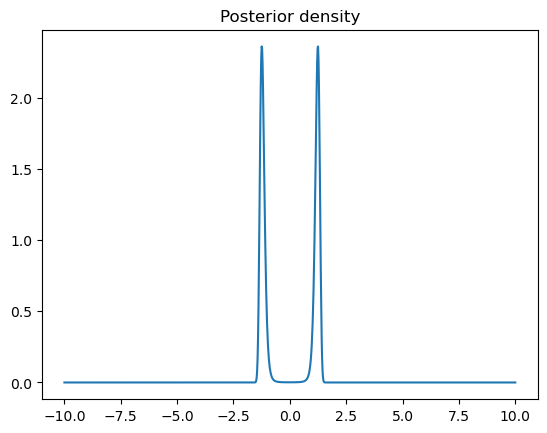

In [17]:
plt.plot(x,z)
plt.title("Posterior density")
plt.show()

In [5]:
MAP=-10+np.argmax(z)*0.02
print("Maximum a posteriori estimator: ", MAP)

Maximum a posteriori estimator:  -1.2599999999999998


- Finding MAPs via gradient descent

In [2]:
def f(x, y):
    return -np.exp((-1/2) * ((y-x**4-x**2)**2 + (x**2)/2))

def df_dx(x, y):
    return -(1/2)*(x + 2*(y - x**4 - x**2) * (-1*4*x**3 - 2*x)) * f(x, y)

def gradient_descent(x, y, learning_rate, tolerance):
    while True:
        gradient = df_dx(x, y)
        update = learning_rate * gradient
        if np.abs(update) <= tolerance:
            break
        x -= update
    return x

# Set the initial value of x and y
x_initial_1 = -1.0
x_initial_2 = 1.0
y = 4.0

# Set the learning rate and tolerance
learning_rate = 0.1
tolerance = 1e-5

# Perform gradient descent
x_optimized_1 = gradient_descent(x_initial_1, y, learning_rate, tolerance)
x_optimized_2 = gradient_descent(x_initial_2, y, learning_rate, tolerance)

# Print the optimized value of x
print("x_1 MAP with GD:", x_optimized_1)
print("x_2 MAP with GD:", x_optimized_2)

x_1 MAP with GD: -1.2436591995560806
x_2 MAP with GD: 1.2436591995560806


### Problem 1.3
#### In our case we have  $V(x) = \frac{(y-x^4-x^2)^2+\frac{x^2}{2}}{2}$
#### $V'(x) = (\frac{x}{2} + (y - x^4 - x^2).(-4x^3-2x))$
#### We will have $V"(x) = (1/2+(28x^6+30x^4+6x^2-2y-12x^2y))$


In [3]:
def V2(x, y):
    return 1/(1/2 + (28*(x**6) + 30*(x**4) + 6*(x**2) - 2*y - 12*(x**2)*y))
z1 = V2(x = 1.272, y = 4)
z2 = V2(x = -1.272, y = 4)

In [4]:
z1,z2

(0.00821829439025431, 0.00821829439025431)

### Problem 1.4

In [5]:
dt = 0.01
T = 10
X = np.arange(-10, T + dt, dt)

var = 0.0082
m = 1.27
def pi(x,var,m): 
    return (1 /np.sqrt(2*np.pi*var))*np.exp((-1/(2*var))*(x-m)**2)

# Vectorized calculation
Y = pi(X,var,m)

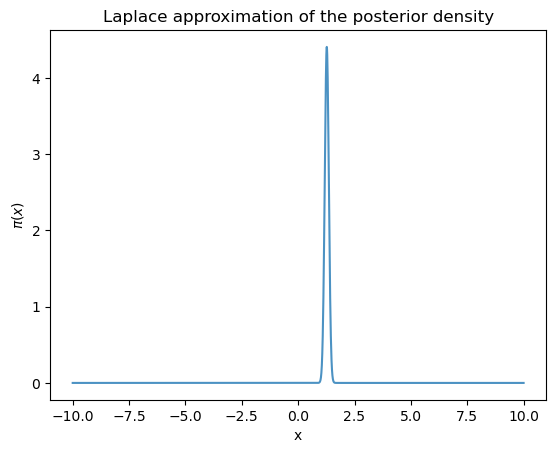

In [12]:
fig, axs = plt.subplots()
sns.lineplot(x = X,y=Y,alpha=0.8, ax = axs)
axs.set(xlabel = "x", ylabel = "$\pi(x)$")
plt.title("Laplace approximation of the posterior density")
plt.show()

In [9]:
def hist_plt(time_points, sim_mat, bins, alp: float):
    num_plots = len(time_points)
    num_rows = int(np.ceil(np.sqrt(num_plots)))
    num_cols = int(np.ceil(num_plots / num_rows))
    
    # Get a colormap
    cmap = plt.get_cmap('tab10')
    
    # Get the corresponding colors from the colormap
    colors = [cmap(i % 10) for i in range(len(time_points))]
    
    # Iterate over the time points and plot histograms
    fig, axs = plt.subplots(num_rows, num_cols,figsize = (20,18))
    axs = axs.ravel()
    for i, t in enumerate(time_points):
        # Get the corresponding index in T
        t_index = int(t / dt)
        # Extract the values at the given time point
        if t_index > 0:
            values = sim_mat[:, t_index - 1]
        else:
            values = sim_mat[:, t_index]
    
        # Plot histogram with the random color
        sns.histplot(values, bins=bins, kde=True, alpha=alp, label=f't = {t}', color=colors[i], ax=axs[i], stat = 'density')
    
        # Add labels and legend
        axs[i].set(xlabel='Value', ylabel='Frequency')
        axs[i].legend()
    
    # Plot the normal distribution
    samples = np.random.randn(10000)
    i = len(time_points)
    sns.histplot(samples, bins=bins, kde=True, alpha=alp, label='Normal Distribution', color=cmap(i), ax=axs[i])
    axs[i].set(ylabel='Frequency')
    axs[i].legend()
    
    plt.tight_layout()
    plt.show()


In [10]:
final_t = 100
dt = 0.01
x_n = -1
num_sim = 10_000

T = np.arange(dt, final_t, dt)
sim_mat = np.empty((num_sim, len(T) + 1), dtype='float32')
sim_mat[:, 0] = x_n

vals = sim_mat[:, 0]

for i in range(1, len(T) + 1):
    val_tr = ((vals / 2) + (4 - vals ** 4 - vals ** 2) * (-4 * vals ** 3 - 2 * vals)) * dt
    random_nums = np.sqrt(2 * dt) * np.random.randn(num_sim)

    # Update vals with the new values for the next iteration
    vals = vals - val_tr + random_nums

    # Handle overflow errors by clipping the values
   # vals = np.clip(vals, -1e10, 1e10)

    # Set the columns at the nth time step with the obtained values
    sim_mat[:, i] = vals

C:\Users\asus\AppData\Local\Temp\ipykernel_15168\4139779047.py:23: RuntimeWarning: overflow encountered in cast
  sim_mat[:, i] = vals
C:\Users\asus\AppData\Local\Temp\ipykernel_15168\4139779047.py:13: RuntimeWarning: overflow encountered in power
  val_tr = ((vals / 2) + (4 - vals ** 4 - vals ** 2) * (-4 * vals ** 3 - 2 * vals)) * dt
C:\Users\asus\AppData\Local\Temp\ipykernel_15168\4139779047.py:17: RuntimeWarning: invalid value encountered in subtract
  vals = vals - val_tr + random_nums
C:\Users\asus\AppData\Local\Temp\ipykernel_15168\4139779047.py:13: RuntimeWarning: overflow encountered in multiply
  val_tr = ((vals / 2) + (4 - vals ** 4 - vals ** 2) * (-4 * vals ** 3 - 2 * vals)) * dt
C:\Users\asus\AppData\Local\Temp\ipykernel_15168\4139779047.py:13: RuntimeWarning: overflow encountered in square
  val_tr = ((vals / 2) + (4 - vals ** 4 - vals ** 2) * (-4 * vals ** 3 - 2 * vals)) * dt


Plotting the results for different terminal times and overlaying the approximated density

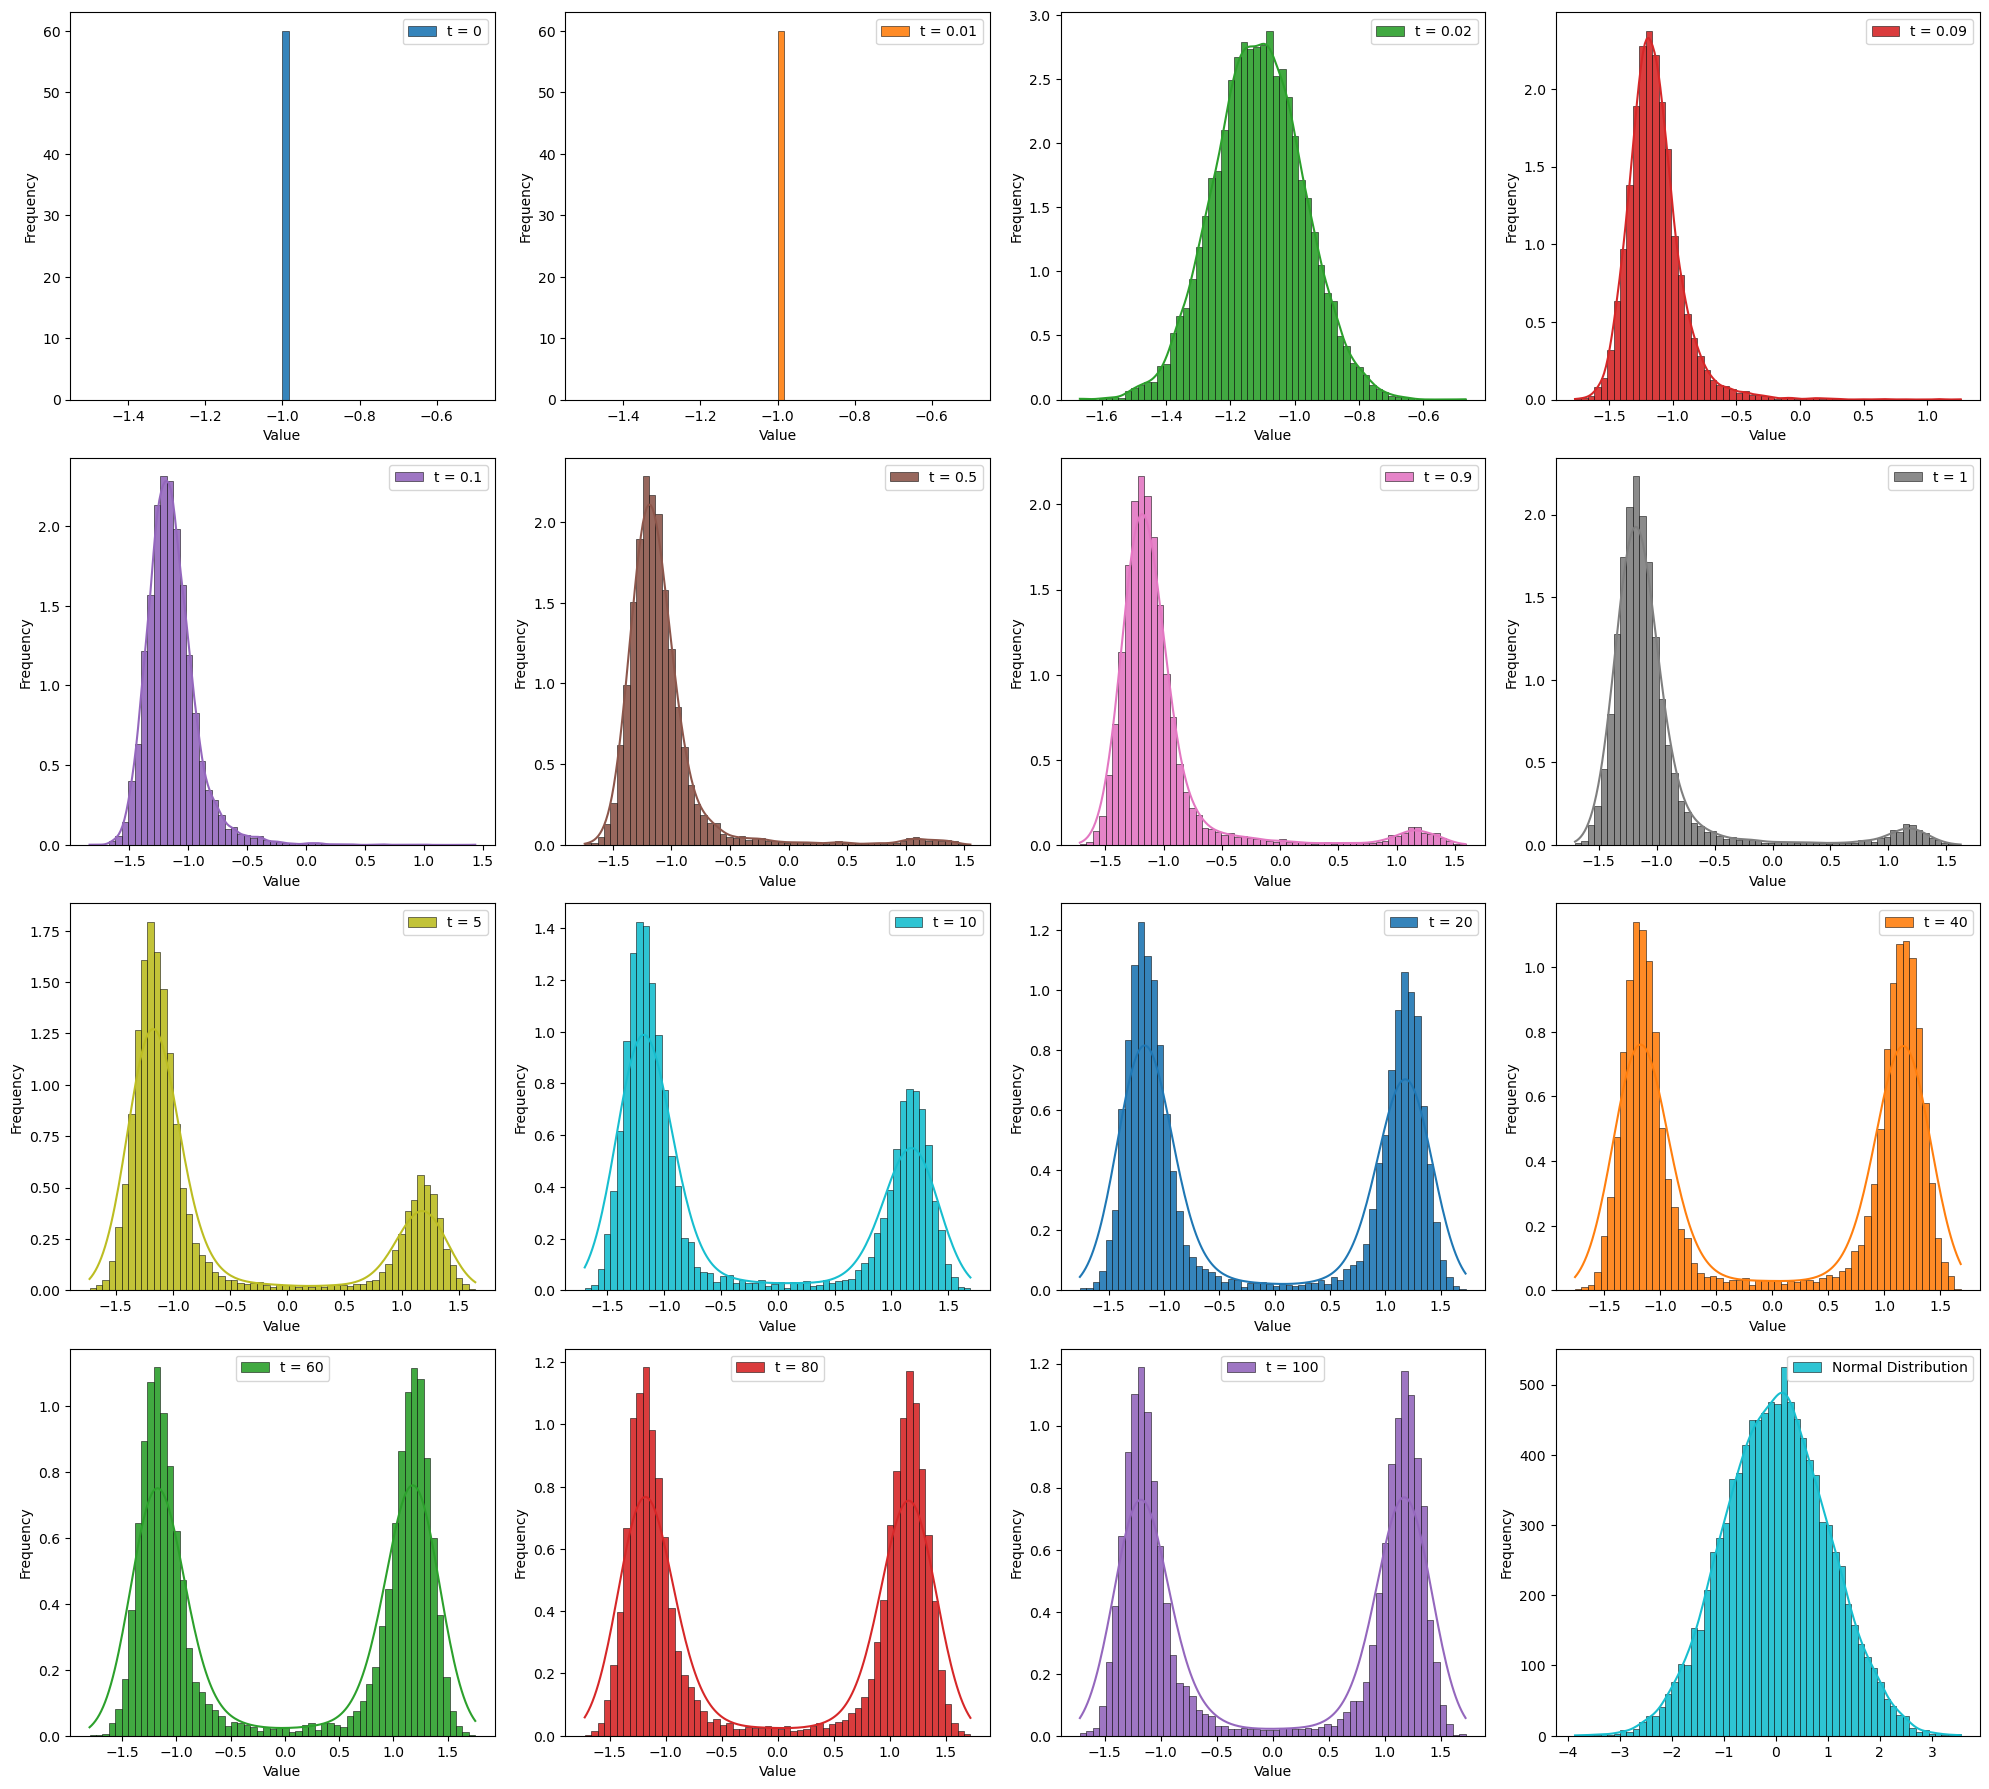

In [15]:
# If we begin at X_n = -1
time_points = [0,0.01,0.02,0.09,0.1,0.5,0.9,1,5,10,20,40,60,80,100]
hist_plt(time_points, sim_mat,60,alp=0.9)

We see that if we start in +1 the right peak grows first (because we are closer to the right point of maximum)

In [19]:
final_t = 100
dt = 0.01
x_n = +1
num_sim = 10_000

T = np.arange(dt, final_t, dt)
sim_mat = np.empty((num_sim, len(T) + 1), dtype='float32')
sim_mat[:, 0] = x_n

vals = sim_mat[:, 0]

for i in range(1, len(T) + 1):
    val_tr = ((vals / 2) + (4 - vals ** 4 - vals ** 2) * (-4 * vals ** 3 - 2 * vals)) * dt
    random_nums = np.sqrt(2 * dt) * np.random.randn(num_sim)

    # Update vals with the new values for the next iteration
    vals = vals - val_tr + random_nums

    # Handle overflow errors by clipping the values
    #vals = np.clip(vals, -1e10, 1e10)

    # Set the columns at the nth time step with the obtained values
    sim_mat[:, i] = vals

C:\Users\asus\AppData\Local\Temp\ipykernel_15168\1478273493.py:23: RuntimeWarning: overflow encountered in cast
  sim_mat[:, i] = vals
C:\Users\asus\AppData\Local\Temp\ipykernel_15168\1478273493.py:13: RuntimeWarning: overflow encountered in multiply
  val_tr = ((vals / 2) + (4 - vals ** 4 - vals ** 2) * (-4 * vals ** 3 - 2 * vals)) * dt
C:\Users\asus\AppData\Local\Temp\ipykernel_15168\1478273493.py:17: RuntimeWarning: invalid value encountered in subtract
  vals = vals - val_tr + random_nums
C:\Users\asus\AppData\Local\Temp\ipykernel_15168\1478273493.py:13: RuntimeWarning: overflow encountered in power
  val_tr = ((vals / 2) + (4 - vals ** 4 - vals ** 2) * (-4 * vals ** 3 - 2 * vals)) * dt
C:\Users\asus\AppData\Local\Temp\ipykernel_15168\1478273493.py:13: RuntimeWarning: overflow encountered in square
  val_tr = ((vals / 2) + (4 - vals ** 4 - vals ** 2) * (-4 * vals ** 3 - 2 * vals)) * dt


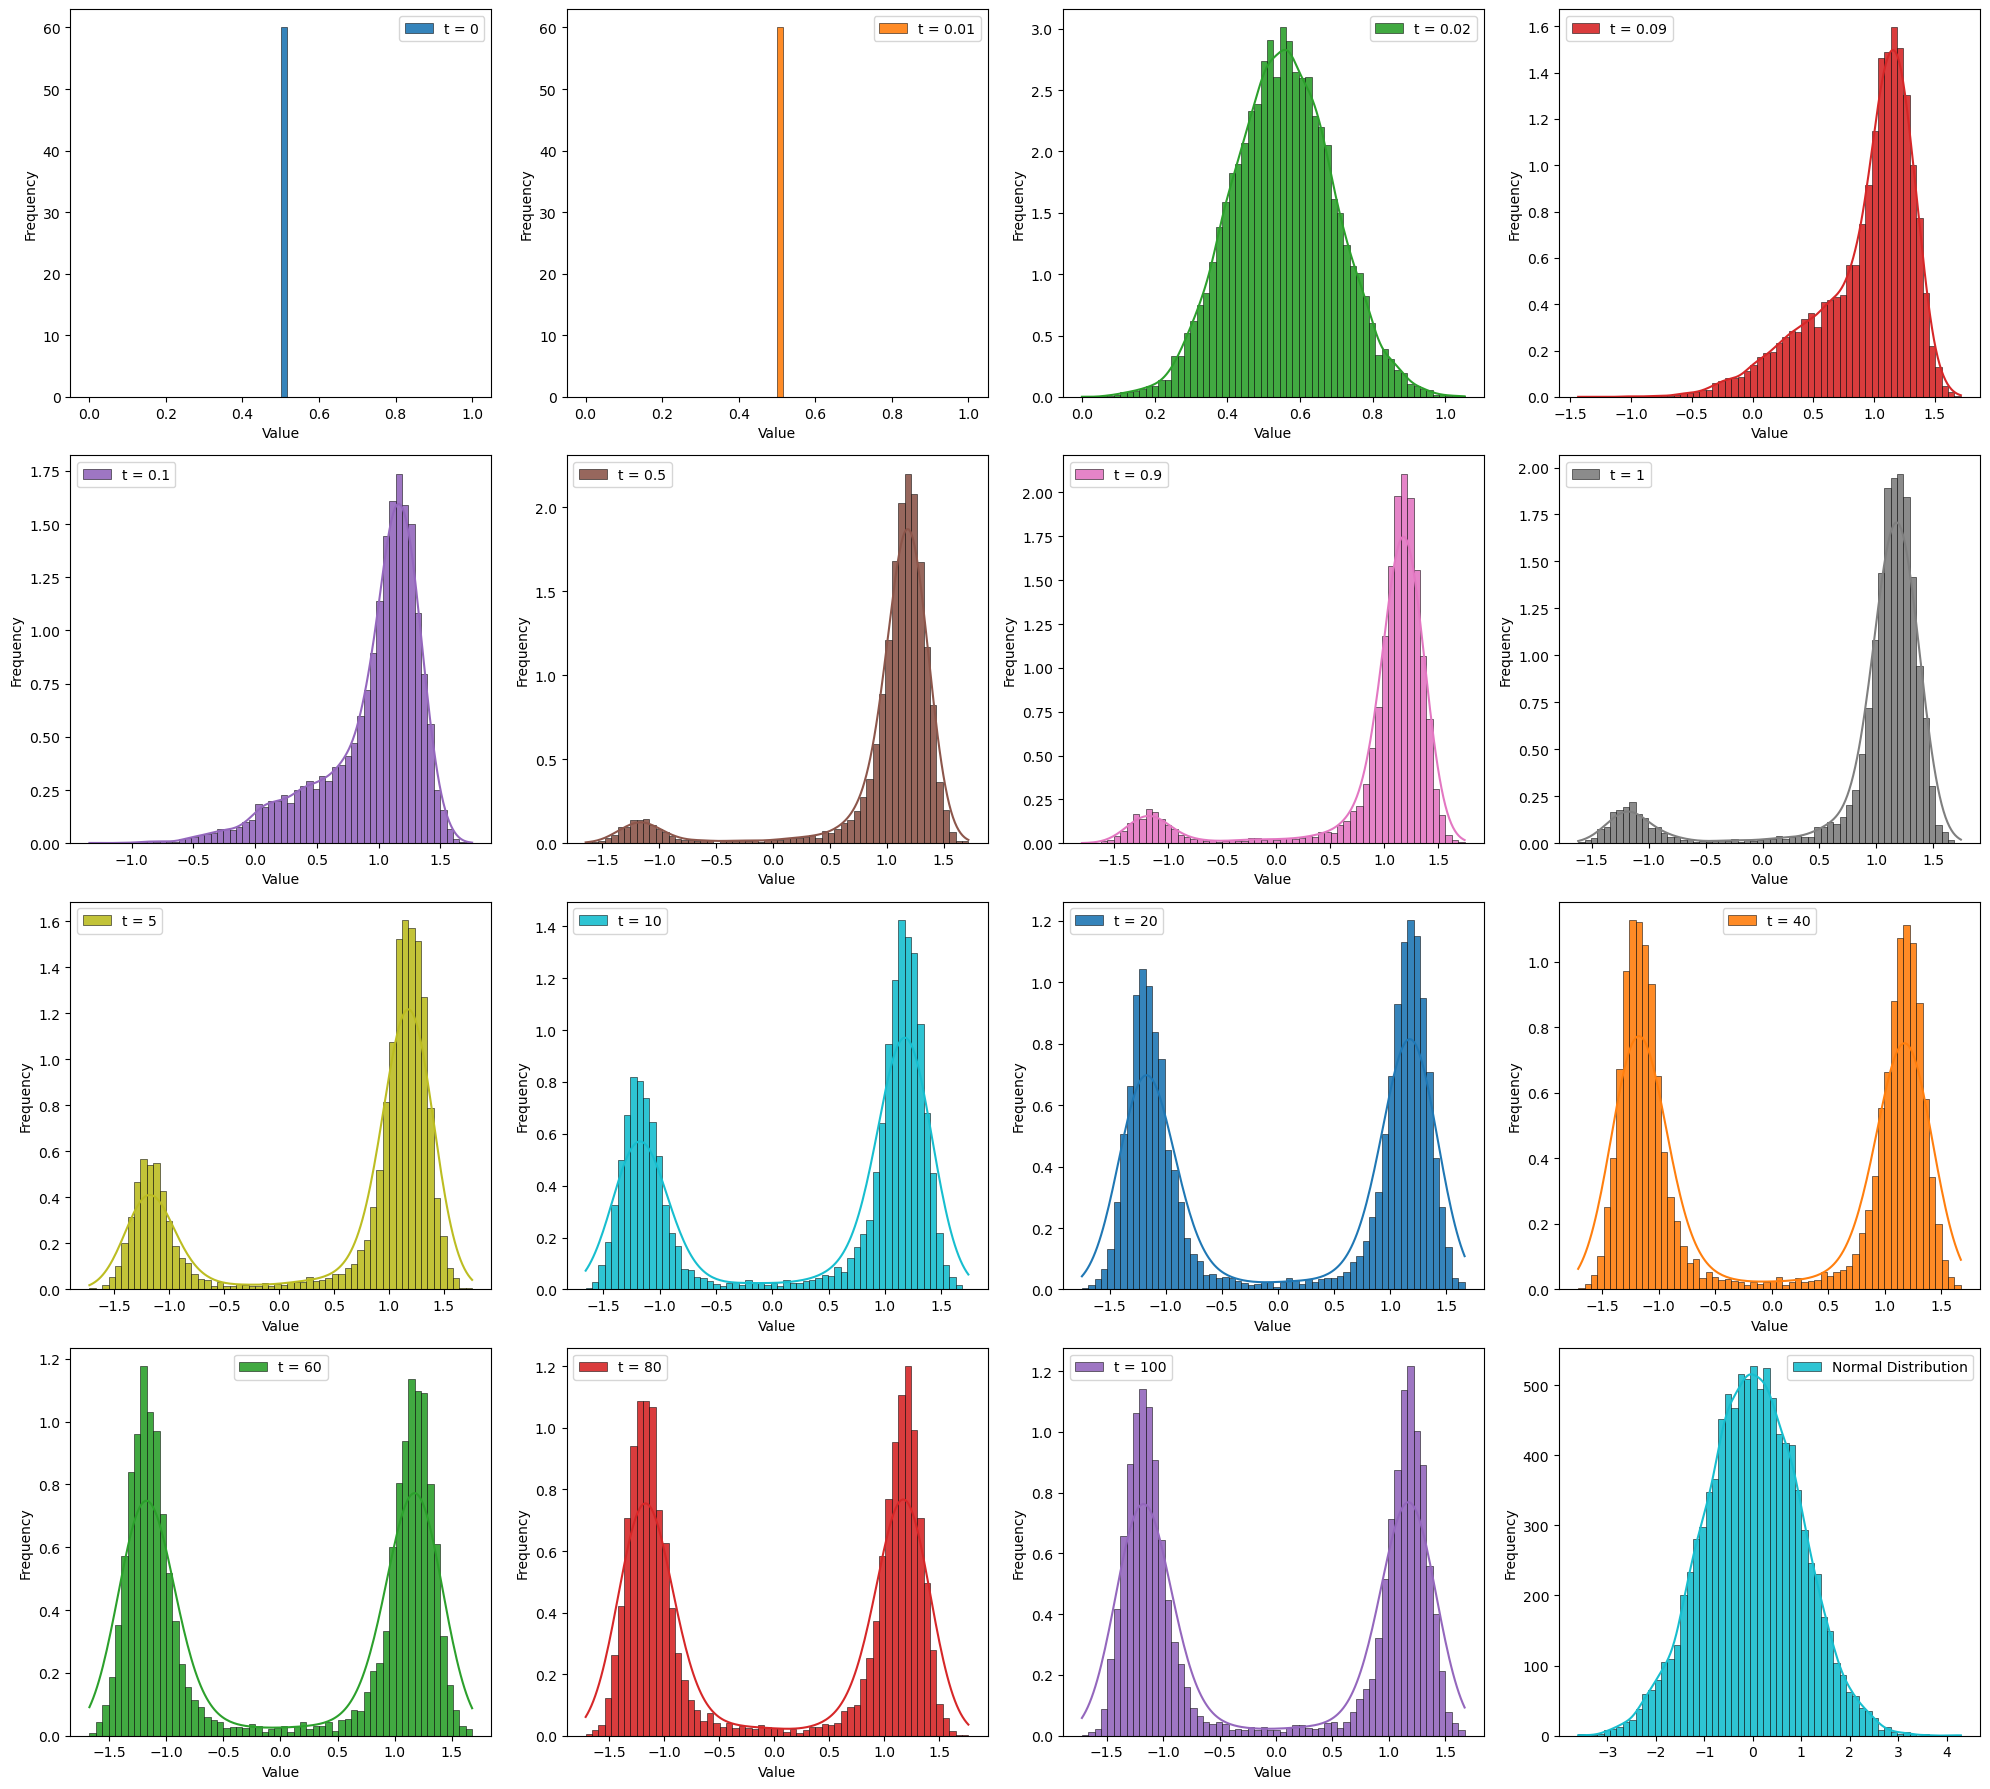

In [18]:
# If we begin at X_n = +1
time_points = [0,0.01,0.02,0.09,0.1,0.5,0.9,1,5,10,20,40,60,80,100]
hist_plt(time_points, sim_mat,60,alp=0.9)

### Problem 1.5

About computational effort the Laplace method works well in 1 dimension, but in higher dimension computing the Hessian matrix and its inverse can be very expensive. Then in higher dimension the Langevin method makes more sense, while in 1 dimension the Laplace method is more convenient, even if in this case the approximation of the density is partially accurate because we get a function that has only one of the two maxima. Concerning the accuracy and possible errors of the Langevin method it approximates well the density even if it has more than one maximum, but we need to pay attention to the terminal time, since if we end up too fast then the result is not accurate at all. 